In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/pokemon.csv')
display(dataset.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [2]:
from sklearn.cluster import KMeans

stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
X = dataset[stats]
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(X)


KMeans(n_clusters=4)

In [3]:
groups = []

for k in range(n_clusters):
    groups.append(dataset.iloc[km.labels_ == k])


In [4]:
pd.set_option('display.max_rows', 1000)
i = 0

for g in groups:
    g = g.sort_values('base_total')
    #display(g[['name', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']])

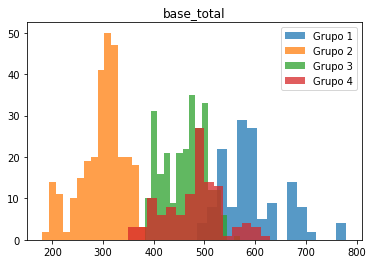

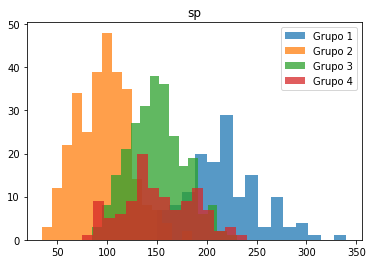

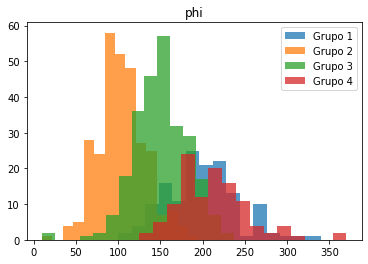

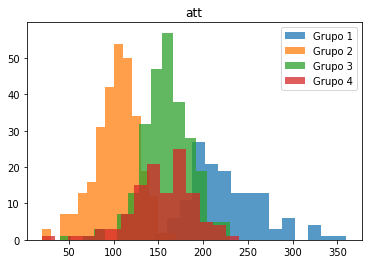

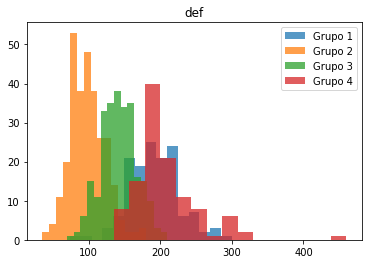

In [34]:
base_stats = ['base_total']
#for s in stats:
for s in range(0):
    
    fig, ax = plt.subplots()
    ax.set_title(s)
    i = 0
    for g in groups[2:4]:
        i += 1
        histx = ax.hist(g[s], alpha=0.75, label=str(i))
        hists = (hists, histx)
    ax.legend()
    plt.show()

for g in groups:
    g['sp'] = g['sp_attack'] + g['sp_defense']
    g['phi'] = g['attack'] + g['defense']
    g['att'] = g['attack'] + g['sp_attack']
    g['def'] = g['defense'] + g['sp_defense']


stats_2 = ['base_total', 'sp', 'phi', 'att', 'def']
for s in stats_2:
    fig, ax = plt.subplots()
    ax.set_title(s)
    i = 0
    for g in groups:
        i += 1
        ax.hist(g[s], alpha=0.75, label="Grupo " + str(i), bins=15)
    ax.legend()

In [33]:
dataset.iloc[km.labels_ == 1]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.50,2.0,2.00,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.00,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.00,1.0,...,88.1,8,65,80,58,water,NaN,22.5,1,0
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.00,1.0,...,50.0,12,90,80,70,bug,flying,32.0,1,0
14,"['Swarm', 'Sniper']",0.50,1.0,1.0,1.0,0.5,0.25,2.0,2.00,1.0,...,50.0,15,15,80,145,bug,poison,29.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,"['Iron Barbs', 'Lightningrod', 'Sturdy']",0.50,1.0,0.5,0.5,0.5,2.00,2.0,0.25,1.0,...,50.0,777,40,73,96,electric,steel,3.3,7,0
777,['Disguise'],0.25,1.0,0.0,1.0,1.0,0.00,1.0,1.00,2.0,...,50.0,778,50,105,96,ghost,fairy,0.7,7,0
778,"['Dazzling', 'Strong Jaw', 'Wonder Skin ']",2.00,2.0,1.0,2.0,1.0,0.50,0.5,1.00,2.0,...,50.0,779,70,70,92,water,psychic,19.0,7,0
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.00,1.0,...,50.0,783,65,70,65,dragon,fighting,47.0,7,0


In [50]:
for s in stats:
    print(s, dataset[s].max(), dataset[s].min())

hp 255 1
attack 185 5
defense 230 5
sp_attack 194 10
sp_defense 230 20
speed 180 5


In [51]:
for g in groups:
    print(len(g))

140
292
256
113


5 112
70 230


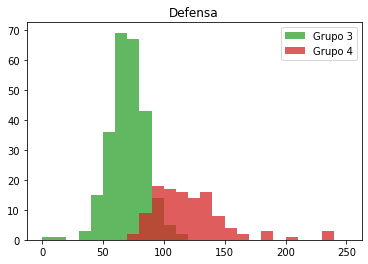

In [79]:
fig, ax = plt.subplots()
s = "defense"
ax.set_title("Defensa")
bins = np.arange(0, 260, 10)
i = 2
for g in groups[2:4]:
    i += 1
    N, bins, l = ax.hist(g[s], alpha=0.75, label="Grupo " + str(i), bins=bins, color='C' + str(i-1))
    print(g[s].min(), g[s].max())
ax.legend()
#fig.savefig('pokedef.png', dpi=300)

In [59]:
bins = np.arange(180, 800, 20)

In [58]:
bins

array([180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420,
       440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
       700, 720, 740, 760])